<a href="https://colab.research.google.com/github/Navneet2409/Airbnb-Booking-Analysis/blob/main/Airbnb_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **AirBnb Bookings Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


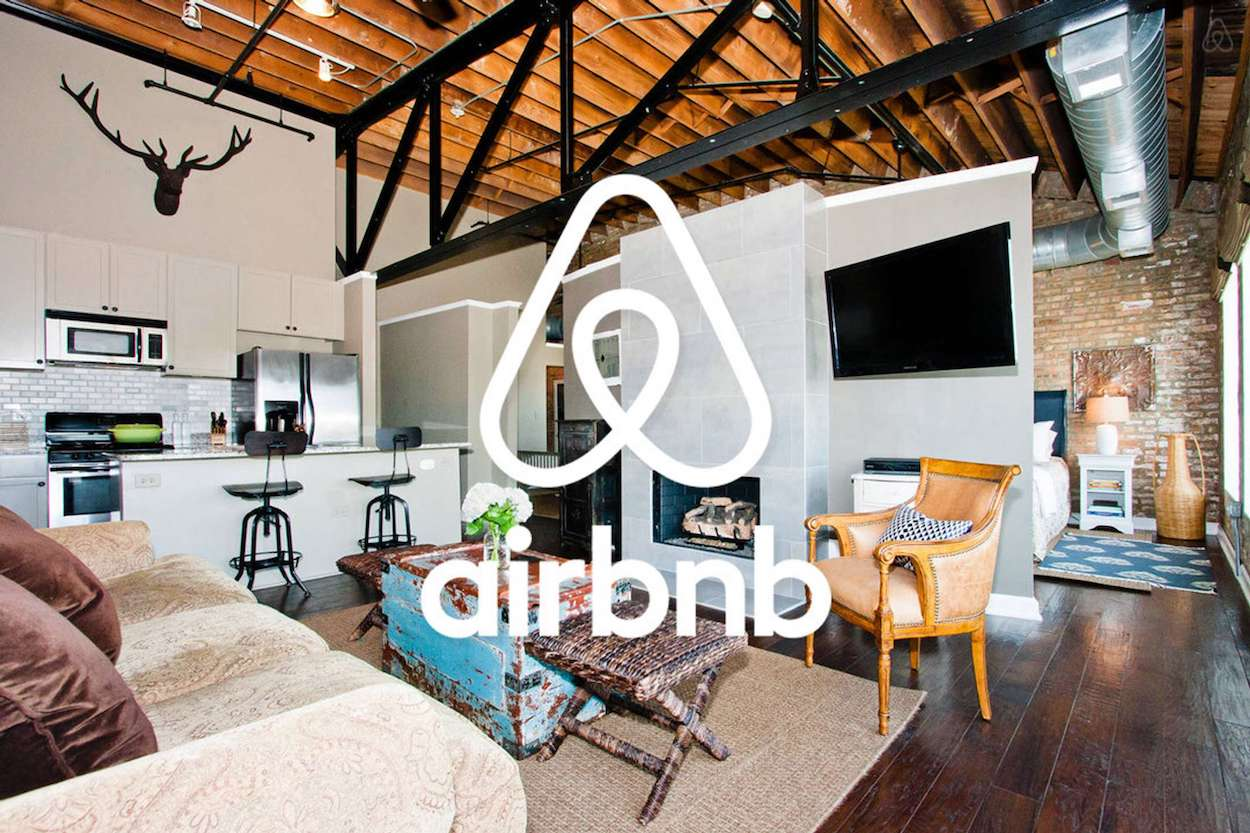

# **GitHub Link -**

https://github.com/Navneet2409/Airbnb-Booking-Analysis

# **Project Summary -**

This project aims to do exploratory data analysis of the listings on Airbnb. Airbnb has a global reach, and data analysis plays a crucial role in its operations. Millions of listings on Airbnb generate vast amounts of data that can be used for security, business decisions, understanding of customer and provider behavior, innovation, marketing initiatives, and more. The project focuses on utilizing historical data of Airbnb listings in New York as it is highlighted as one of the most popular places for tourism and business.

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Hypothesis Testing
7.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Airbnb is a popular online marketplace connecting homeowners who want to rent out their homes with travelers seeking accommodations in a specific location. Airbnb offers people an easy, relatively stress-free way to earn some income from their property. New York City is highlighted as one of the most popular places for tourism and business. Since its launch in 2008, Airbnb has expanded the possibilities of travel and offers a unique and personalized way of experiencing the world.  

Airbnb makes the bulk of its revenue by charging a service fee for each booking. Guests often find Airbnb is cheaper, has more character, and is homier than hotels. In this project, we are finding the followings:

*  Do the EDA of the given dataset using Numpy and Pandas, and find the relationship between different variables.
* Find out features that are important for Airbnb from a business perspective.
* Do the cost and revenue analysis and find out groups where Airbnb can focus to increase its profit.
* Analyze the sentiment from ratings of the customers. Find out the relationship between price and user's rating if there is any. 

### **Business Context** 

The business context of this project is the popularity and success of Airbnb. Airbnb is an innovative service that has transformed the travel and hospitality industry by providing unique, personalized experiences for travelers and a hassle-free way for homeowners to monetize their properties. 

Data analysis is a crucial element of Airbnb's business, allowing the company to make informed decisions, ensure security, and innovate in response to customer and provider behavior.

## **2. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to import datetime library
from datetime import datetime
import datetime as dt

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [2]:
# load the airbnb nyc 2019 data set from the drive
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Airbnb Bookings Analysis - Navneet Keshri/Airbnb NYC 2019 dataset.csv')

### Dataset First View

In [3]:
# Viewing the top 5 rows to take a glimpse of the data
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns Count

In [4]:
# Dataset Rows & Columns 
airbnb.shape

(48895, 16)

In [5]:
print(f'number of rows : {airbnb.shape[0]}  \nnumber of columns : {airbnb.shape[1]}')

number of rows : 48895  
number of columns : 16


### Dataset Information

In [6]:
# Dataset Info
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We have  48895 rows and 16 columns in our dataset. Most of them are numeric with int64 and float64 dtype 

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [7]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value = len(airbnb[airbnb.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [8]:
# Missing Values/Null Values Count
print(airbnb.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<AxesSubplot:>

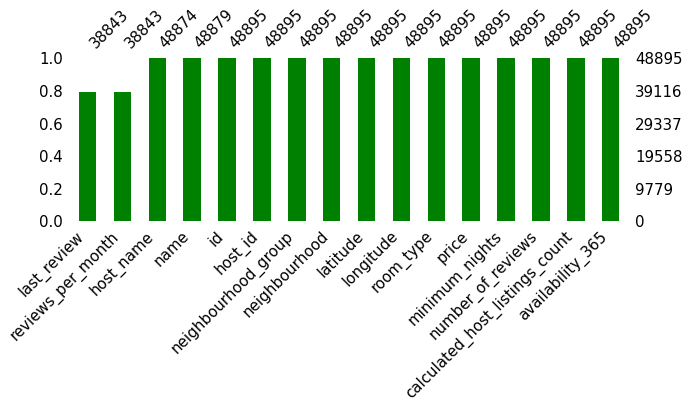

In [9]:
# Visualizing the missing values
import missingno as msno
msno.bar(airbnb, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<AxesSubplot:>

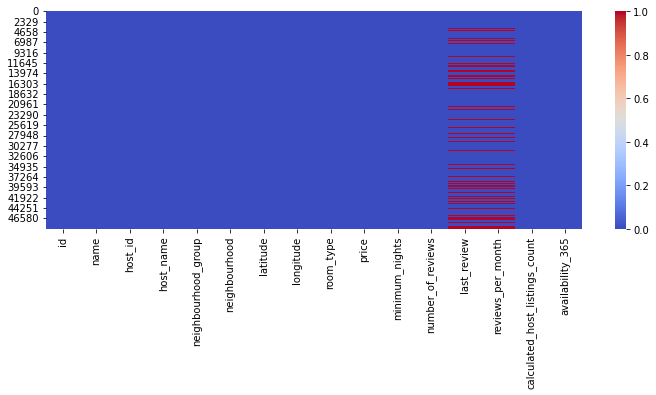

In [10]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(airbnb.isna(), cmap = 'coolwarm')

From the above command, we noticed that most of the columns has 0 null values. We have some null values in name, host_name, last_review, and reviews_per_month columns. We will treat them later.

### What did you know about your dataset?

The dataset provided contains 16 columns and 48895 rows. Our data has missing values in some coulmns but does not has any duplicate values.

## **3. Understanding Your Variables**

###  Columns

In [11]:
# Dataset Columns
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

###  Statistical Summary

In [12]:
# Dataset Describe
airbnb.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,48895.0,NaN,NaN,NaN,19017143.23618,10983108.38561,2539.0,9471945.0,19677284.0,29152178.5,36487245.0
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0


###  Variables Description

The dataset contains information about host and guest names and bookings done by them 

<b>Attribute Information: </b>

* **id :** a unique identifier.
* **name :** hotel or apartment name.
* **host_id :** assigned id to host  (considering different hotels for the
same host_id because of location)
* **host_name :** the name of the host (one person can stay in a different hotel/apartment)
* **neighbourhood_group :** an area where the hotel belongs to (5 groups - Manhattan, Brooklyn, Queens, Bronx, Staten Island)
* **neighbourhood :** many sub-areas belong to 5 groups where hotels are situated (consider as towns under the district)
* **latitude :** latitude coordinates for the location of the hotel.
* **longitude :** longitude coordinates for the location of the hotel.
* **room_type :** 3 types of rooms which are (entire home/apt, private room, shared room)
* **price :** from 0 to 10000$ 
* **minimum_nights :** ranging from 1 to 1250.
* **number_of_reviews :** number of reviews for the hotel by users.
* **last_review :** last date when a hotel/apartment is reviewed by the user.
* **reviews_per_month :** how many reviews the hotel gets per month.
* **calculated_host_listings_count :** Number of times the listing is done by a particular host (count of aparticular hotel name in the data rows)
* **availability_365 :** values ranged from 0 to 365 as per the availability (number of days in a year)

### Unique Values

In [13]:
# print the unique value
airbnb.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [14]:
# Check Unique Values for each variable.
for i in airbnb.columns.tolist():
  print("No. of unique values in ",i,"is",airbnb[i].nunique())

No. of unique values in  id is 48895
No. of unique values in  name is 47905
No. of unique values in  host_id is 37457
No. of unique values in  host_name is 11452
No. of unique values in  neighbourhood_group is 5
No. of unique values in  neighbourhood is 221
No. of unique values in  latitude is 19048
No. of unique values in  longitude is 14718
No. of unique values in  room_type is 3
No. of unique values in  price is 674
No. of unique values in  minimum_nights is 109
No. of unique values in  number_of_reviews is 394
No. of unique values in  last_review is 1764
No. of unique values in  reviews_per_month is 937
No. of unique values in  calculated_host_listings_count is 47
No. of unique values in  availability_365 is 366


### Observations: 

* We are focusing on several key columns of our dataset, including  'host_name', 'neighbourhood_group', 'neighbourhoood', 'room_type', 'price', 'minimum_nights', and 'number_of_reviews' as they contain a wealth of information.

## **4. EDA**

### **What is EDA?**
* Exploratory Data Analysis (EDA) is a critical step in the data science process that involves analyzing and understanding the data. The primary objective of EDA is to gain insights into the data, uncover patterns, and detect relationships and trends. This iterative process helps identify outliers, missing values, and other issues that may impact the analysis and modeling of the data.


### **4.1 Column: 'name'**

Text(0.5, 1.0, 'Most listed Hotel Name present in Newyork')

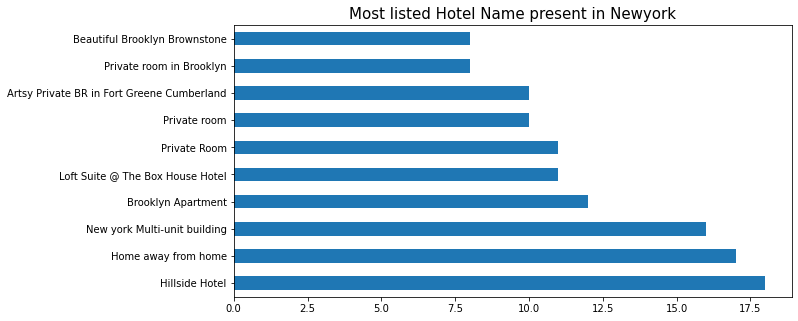

In [15]:
# Most listed Hotel Name present in Newyork
name = airbnb['name'].value_counts()[:10].plot(kind='barh', figsize = (10,5))
name.set_title('Most listed Hotel Name present in Newyork', size=15)

**Observation:**
* With a total of 18 listings, the Hillside Hotel is the most popular hotel in Newyork.

### **4.2 Column: 'host_name'**

Text(0.5, 1.0, 'Most listed Host Name')

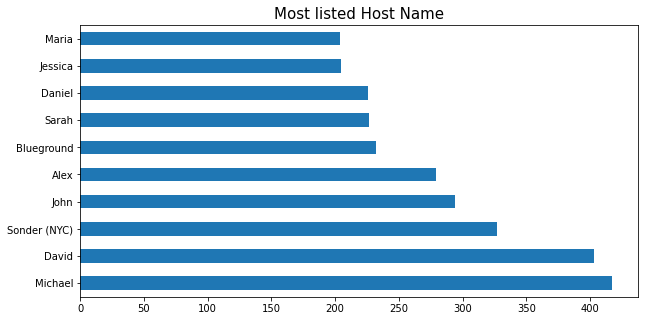

In [16]:
# Most listed Host Name present in Airbnb listings
host_name = airbnb['host_name'].value_counts()[:10].plot(kind='barh', figsize = (10,5))
host_name.set_title('Most listed Host Name', size=15)

**Observation:**
* Michael, David, and Sonder(NYC) are 3 topmost listed hostname.

### **4.3 Column: 'neighbourhood_group'**

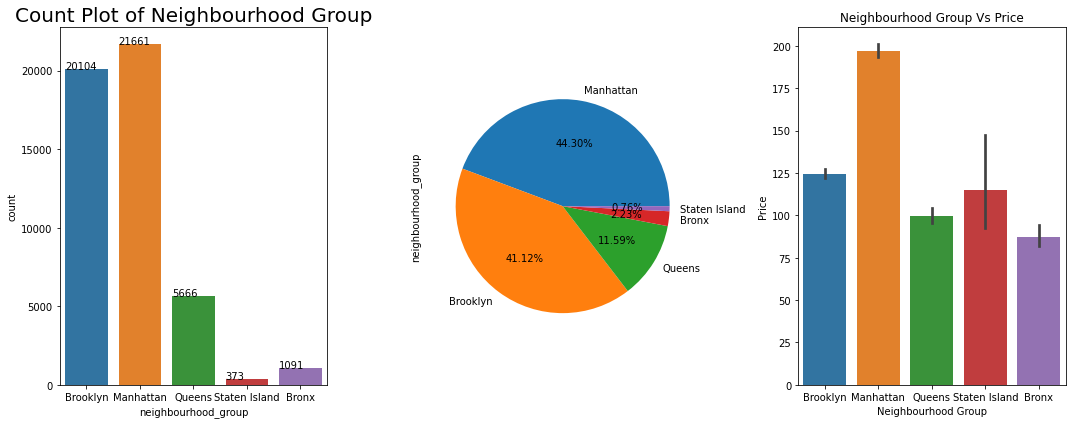

In [17]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# countplot 
graph = sns.countplot(data=airbnb, x='neighbourhood_group', ax=ax[0])
graph.set_title('Count Plot of Neighbourhood Group', size=20)

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# piechart
airbnb['neighbourhood_group'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6))
plt.title('Percentage Distribution of Neighbourhood Group', size=20)

# Bi-variate analysis 
# Neighbourhood Group Vs Price
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='price', ax = ax[2])
bar.set(xlabel='Neighbourhood Group', ylabel='Price', title='Neighbourhood Group Vs Price')

plt.tight_layout()
plt.show()

**Observations:**

* Manhattan has most number of listings followed by Brooklyn and Queens, while Staten Island has least number of listings.
* 85% of listing on Airbnb comes from Manhattan and Brooklyn.
* Even with the high number of listings in Manhattan and Brooklyn, the average price of the hotel is also too high which indicates that the demand in these two areas is massive.

### **4.4 Column: 'neighbourhood'**

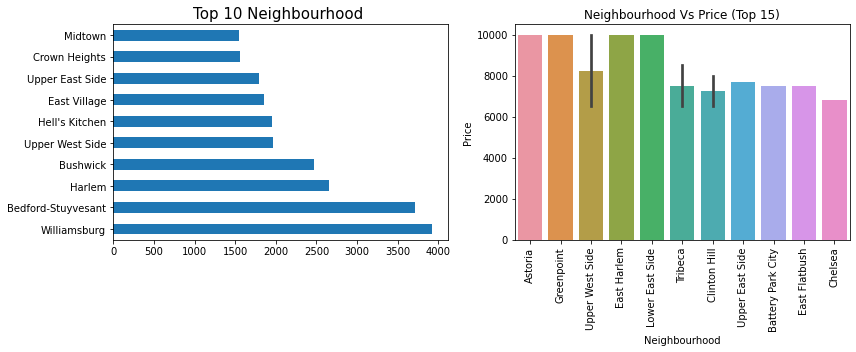

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Most listed Neighbourhood present in Airbnb listings
neighbourhood = airbnb['neighbourhood'].value_counts()[:10].plot(kind='barh', ax=ax[0])
neighbourhood.set_title('Top 10 Neighbourhood ', size=15)

# Bi-variate analysis 
# Neighbourhood Vs Price
top15=airbnb.nlargest(15, 'price')
bar = sns.barplot(data=top15, x='neighbourhood', y='price', ax=ax[1])
bar.set(xlabel='Neighbourhood', ylabel='Price', title='Neighbourhood Vs Price (Top 15)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Observations:**

* Williamsburg, Bedford-Stuyvesant and Harlem are most popular and has most number of listings.
* Astoria, GreenPoint and Upper West Side are most costly neighbourhood in the dataset.

### **4.5 Columns: 'latitude and longitude'**

Text(0.5, 1.0, 'Location Coordinates')

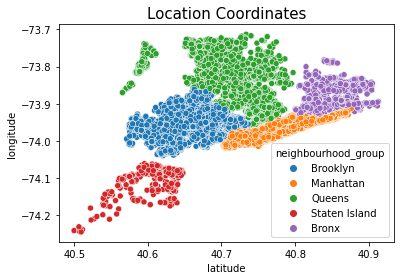

In [19]:
# Location Coordinates for Airbnb listings
scatter = sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=airbnb)
scatter.set_title('Location Coordinates', size=15)

**Observations:**

* Scatter plot is used to visualize the locations of all the hotels listed in the dataset. Staten Island listings are sparsely separated from each other.
* Manhattan listings are most dense in the dataset.

### **4.6 Column: 'room_type'**

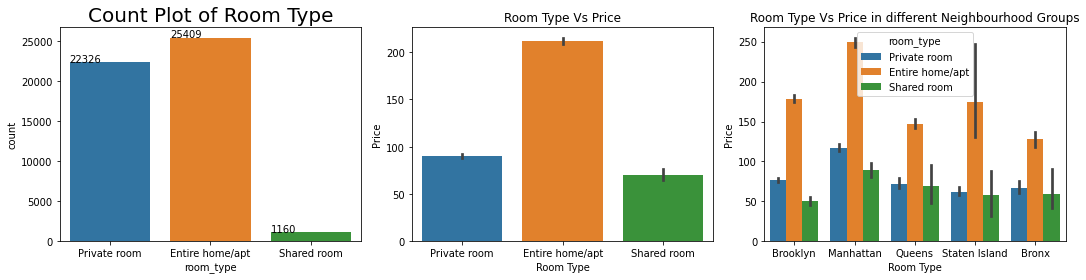

In [20]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# countplot 
graph = sns.countplot(data=airbnb, x='room_type', ax=ax[0])
graph.set_title('Count Plot of Room Type', size=20)

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Room Type Vs Price
bar = sns.barplot(data=airbnb, x='room_type', y='price', ax = ax[1])
bar.set(xlabel='Room Type', ylabel='Price', title='Room Type Vs Price')

# Multivariate analysis 
# Room Type Vs Price with Neighbourhood Group
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='price', hue='room_type', ax = ax[2])
bar.set(xlabel='Room Type', ylabel='Price', title='Room Type Vs Price in different Neighbourhood Groups')

plt.tight_layout()
plt.show()

**Observations:**

* Entire home/apt is the most preferred room type in Airbnb and has the most number of listings, therefore.
* Due to the high demand for the entire home/apt it is the most costly one too followed by a private room.
* In all the neighborhood groups entire home/apt is the most costly which indicates its high demand all over Newyork.

### **4.7 Column: 'price'**

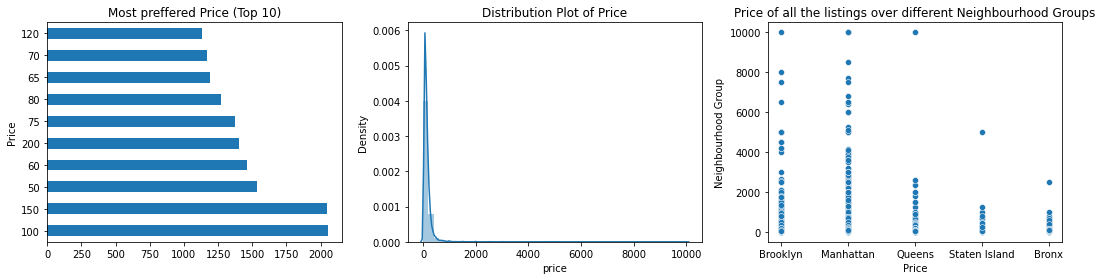

In [21]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
# Most preffered Price
alos = airbnb['price'].value_counts()[:10].plot(kind='barh', ax=ax[0])
alos.set(title='Most preffered Price (Top 10)', ylabel='Price')

# Univariate analysis
dist = sns.distplot(airbnb.price, ax = ax[1])
dist.set_title('Distribution Plot of Price')

# Bi-variate analysis 
# Rented Bike Count Vs Price
scatter = sns.scatterplot(data=airbnb, x='neighbourhood_group', y='price', ax = ax[2])
scatter.set(xlabel='Price', ylabel='Neighbourhood Group', title='Price of all the listings over different Neighbourhood Groups')

plt.tight_layout()
plt.show()

**Observations:**
* Price of USD 100 and USD 150 for one night is highly preffered by customers.
* Price distribution is highly skewed to positive. Most of the price of all the listings belongs to 0 to 2000 USD.
* price of the listed properties varies from 0 to 10000 which indicated that there are many wrong entries and outliers in the price.


### **4.8 Column: 'minimum_nights'**

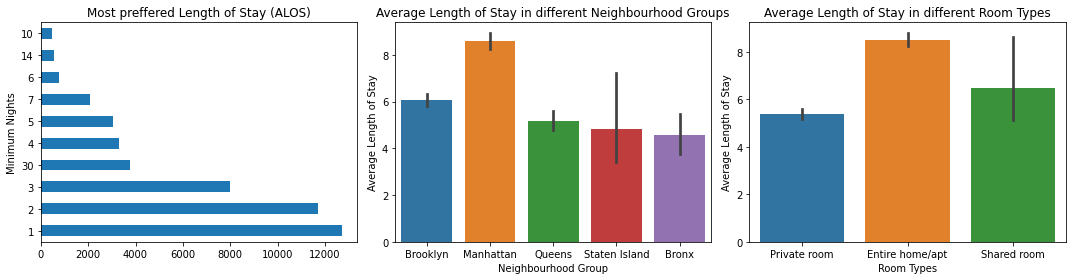

In [22]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
# Most preffered Length of Stay (ALOS)
alos = airbnb['minimum_nights'].value_counts()[:10].plot(kind='barh', ax=ax[0])
alos.set(title='Most preffered Length of Stay (ALOS)', ylabel='Minimum Nights')

# Bi-variate analysis
# Minimum Nights Vs Neighbourhood Group
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='minimum_nights', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Average Length of Stay', title='Average Length of Stay in different Neighbourhood Groups')

# Bi-variate analysis
# Minimum Nights Vs Room Type
bar = sns.barplot(data=airbnb, x='room_type', y='minimum_nights', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Average Length of Stay', title='Average Length of Stay in different Room Types')

plt.tight_layout()
plt.show()

**Observations:**
* Most customers preffer to stay for 1,2 or 3 nights.
* Manhattan has maximum average lengh of stay which is over 8 nights followed by Brooklyn which is over 6 nights. Bronx has minimum length of stay.
* Entire home/apt has maximum average length of stay followed by shared room.

### **4.9 Column: 'number_of_reviews'**

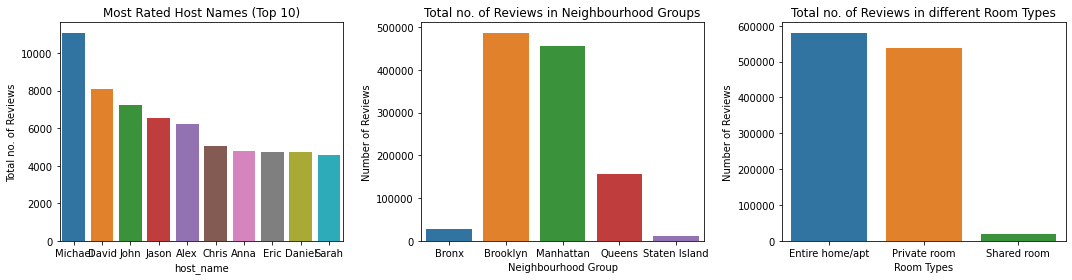

In [28]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Bi-variate analysis
# Most Rated Host Name
nor_host_name = airbnb[['number_of_reviews','host_name']].groupby('host_name').sum().sort_values(by='number_of_reviews', ascending=False)
top_10_nor = nor_host_name.head(10).reset_index()
nor = sns.barplot(x='host_name', y='number_of_reviews', data=top_10_nor, ax=ax[0])
nor.set(title='Most Rated Host Names (Top 10)', ylabel='Total no. of Reviews')

# Bi-variate analysis
# Most Rated Neighbourhood Group
nor_neighbourhood = airbnb[['number_of_reviews','neighbourhood_group']].groupby('neighbourhood_group').sum().reset_index()
bar = sns.barplot(data=nor_neighbourhood, x='neighbourhood_group', y='number_of_reviews', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Number of Reviews', title='Total no. of Reviews in Neighbourhood Groups')

# Bi-variate analysis
# Most Rated Room Type
nor_room_type = airbnb[['number_of_reviews','room_type']].groupby('room_type').sum().reset_index()
bar = sns.barplot(data=nor_room_type, x='room_type', y='number_of_reviews', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Number of Reviews', title='Total no. of Reviews in different Room Types')

plt.tight_layout()
plt.show()

**Observations:**
* Top 3 most rated host names are Micheal, David, and John.
* Even though Manhattan has the maximum number of listings yet Brooklyn has the most number of reviews.
* Entire home/apt has the maximum number of reviews.

### **4.10 Column: 'availability_365'**

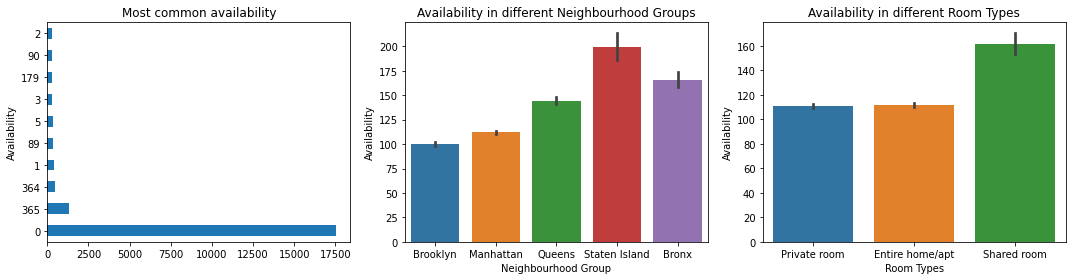

In [31]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
# Most preffered Length of Stay (ALOS)
count = airbnb['availability_365'].value_counts()[:10].plot(kind='barh', ax=ax[0])
count.set(title='Most common availability', ylabel='Availability')

# Bi-variate analysis
# Availability Vs Neighbourhood Group
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='availability_365', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Availability', title='Availability in different Neighbourhood Groups')

# Bi-variate analysis
# Availability Vs Room Type
bar = sns.barplot(data=airbnb, x='room_type', y='availability_365', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Availability', title='Availability in different Room Types')

plt.tight_layout()
plt.show()

**Observations:**
* Most Common availability days in the data is 0 which indicates the wrong entry in the dataset. It makes no sense that the hotel is not available for any day and still has customers listed. 
* Hotels in Staten Island are most of the time available in an entire year.
* Shared Room is available for use the most number of the days in the year.

#<b> Major Findings </b> -
1. Manhattan has the most number of listings (85% of listing on Airbnb come from Manhattan and Brooklyn) with the Host name Sonder having a maximum listing which is 327 in Manhattan.
2.  Manhattan and Brooklyn are also important from a business point of view as the average price of a hotel/apartment is the highest. But important to note that Staten Island was not in the top 3 in number of listings yet it is in the top 3 in the average price of the hotels. 
3. Even though Manhattan and Brooklyn have a max number of listings yet the max number of reviews belongs to Queens which means at least one hotel in Queens is very popular among the users. Most rated hotel/apartment name - Room near JFK Queen Bed
4. There is no significant relationship between availability and average price but the price shoots up from an average of USD 150 to USD 250-300 in some cases which may be hotel/apartment specific.
5. Top 5 neighbourhoods are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and Upper West Side. The entire home is the most preferred room type.
6. People prefer to stay in entire home/apt and Private rooms that is why average price of private rooms are higher than

##<b>Conclusion:
*   Through this Exploratory Data Analysis (EDA) we analyzed Airbnb Bookings Analysis using Pandas and used Seaborn and Matplotlib for the visualization purpose. 
*   Started with understanding the variables, we prepared the data after cleaning it and found the relationship between variables.
*   We also did analyze the data from a business perspective, financial perspective, and sentiment perspective. We used Data Visualization for a better understanding and presentation purpose.
*   Area of focus and assumptions has been clearly stated whenever required. Now is up to Airbnb to utilize this analysis efficiently:)</b>




